# Chirp to ROC
This notebook applies some ML binary classification techniques to a simple 2D dataset and looks at the results with "confusion dots" and ROC plots.

In [246]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.metrics import accuracy_score

# to reload the custom library
from imp import reload
# custom library
import chirp_roc_lib as chp

In [247]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.5, 5.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### (Re)Load the custom routines

In [248]:
reload(chp)

<module 'chirp_roc_lib' from '/home/dd/Documents/Python/chirp-to-ROC/chirp_roc_lib.py'>

### The 2D "diagonal chirp"

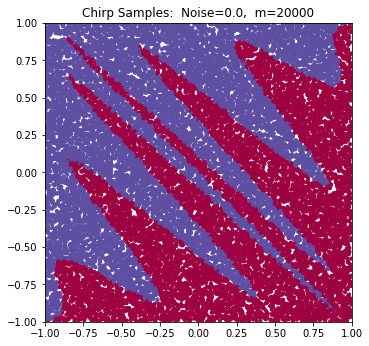

In [249]:
# Show the chirp model with no noise and many samples
#
# Chirp parameters to use (default: 6.5, 0.65, False ):
chp_nhf = 6.5
chp_warp = 0.65
chp_symm = False

show_noise=0.0

X_show, y_show = chp.make_chirp(n_out=20000,
                                nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=show_noise)

chp.plot_Xy(X_show, y_show,
            title="Chirp Samples:  Noise={},  m={}".format(show_noise,len(y_show)), s = 10)

### Training and Test sets
The "test" set is very large to get an accurate measure of the model performance.

In [250]:
# Size of the Training and Test sets...

# Smaller Training is more likely to cause/allow overfitting
m_train = 400  # 100 to 1000

# Do a large test size to see accurately how the model performs and what the model looks like
m_test = 20000

In [251]:
# Could use an sklearn generator, e.g., make_moons, to generate X,Ys:
# Training set
##train_X, train_Y = sklearn.datasets.make_moons(n_samples=m_train, noise=0.2)
# Test set
##test_X, test_Y = sklearn.datasets.make_moons(n_samples=m_test, noise=0.2)

In [252]:
# Use the chirp to generate the training and test sets
# use parameters above, 
# and some noise:
chp_noise = 0.035   # this noise, 0.035, puts Bayes accuracy limit ~ 87 %

# Training set
X_train, y_train = chp.make_chirp(n_out=m_train, 
                                  nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)
# Test set
X_test, y_test = chp.make_chirp(n_out=m_test,
                                nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)

In [253]:
# The sizes and types of the training and test sets
print(X_train.shape, X_train.dtype, y_train.shape, y_train.dtype, X_test.shape, y_test.shape)

(400, 2) float64 (400,) float64 (20000, 2) (20000,)


In [254]:
# example values
print( X_train[0,:], y_train[0])

[-0.49416996  0.63114617] 1.0


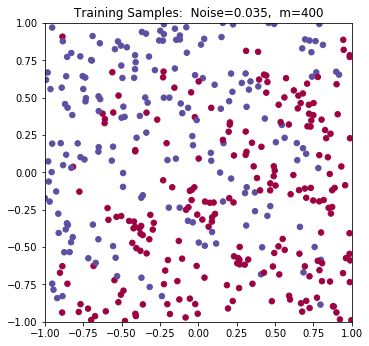

In [255]:
# Look at the Training data
chp.plot_Xy(X_train, y_train, 
            title="Training Samples:  Noise={},  m={}".format(chp_noise,len(y_train)), s=30)

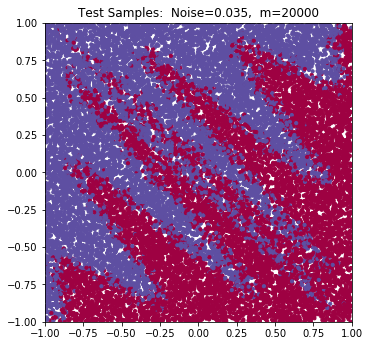

In [256]:
# Look at the Test data
chp.plot_Xy(X_test, y_test,
            title="Test Samples:  Noise={},  m={}".format(chp_noise,len(y_test)), s=10)

## Pick a Model

- - -

### The Known Model

In [257]:
# Use the actual underlying model and known parameters
model_str = "Known Chirp"

In [258]:
# Evaluate the model on training data
# If the noise is > 0 then a probability is returned.
y_score_train = chp.chirp_region(X_train,
                                nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 89.0 %


In [259]:
# Evaluate the (same chirp) model on the test data
y_score = chp.chirp_region(X_test,
                          nhalfcycles=chp_nhf, warpexp=chp_warp, symmetric=chp_symm, noise=chp_noise)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 87.11 %


#### This ~ 87 %, above, is the Bayes limit we'd expect for any learning algorithm.

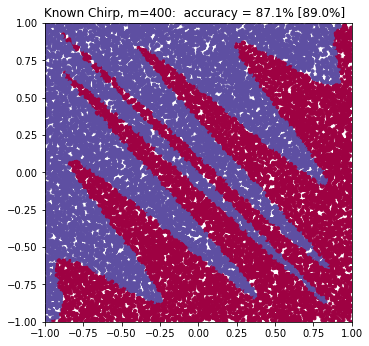

In [260]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [261]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

### Random model

In [262]:
# Just flip a coin (actually assign a random value from 0 to 1)
# No model to Train
model_str = "Random model"

In [263]:
# Evaluate the model on training data
y_score_train = np.random.rand(len(y_train))
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 46.25 %


In [264]:
# Evaluate the model on the test data
y_score = np.random.rand(len(y_test))
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 49.99 %


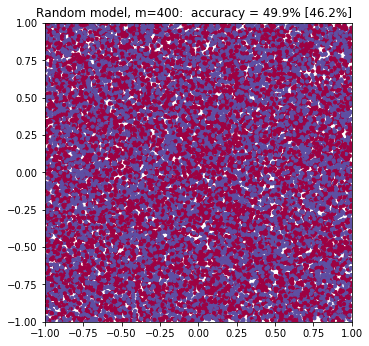

In [265]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [266]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

### Really simple model

In [267]:
# Really simple model: more likely to be y=1 (blue) when x1 is larger, 
# so map x1 to 0 to 1 using: y_score = 0.5 * (X_test[:, 1] + 1.0)
model_str = "Simple model"

In [268]:
# Evaluate the model on training data
y_score_train = 0.5 * (X_train[:, 1] + 1.0)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 67.5 %


In [269]:
# Evaluate the model on the test data
y_score = 0.5 * (X_test[:, 1] + 1.0)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 64.85 %


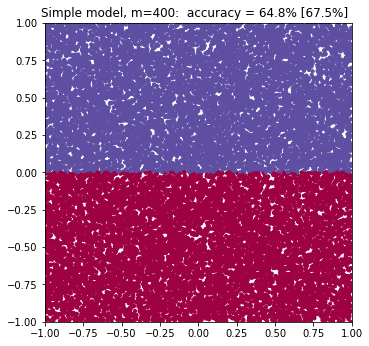

In [270]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [271]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

### Logistic Regression Model

In [272]:
# Use sklearn Logistic Regression
model_str = "Logistic Regr."
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1e5, verbose=1)
# and do the fit:
model.fit( X_train, y_train )
print(model)

[LibLinear]LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)


In [273]:
# Evaluate the model on training data (for y=1, hence the [:,1])
y_score_train = model.predict_proba(X_train)[:,1]
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 77.5 %


In [274]:
# Evaluate the model on the test data
y_score = model.predict_proba(X_test)[:,1]
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 73.83 %


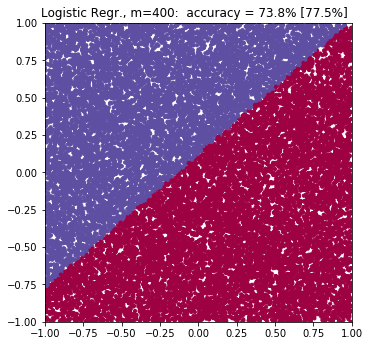

In [275]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [276]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

### Decision Tree

In [277]:
# Use simple sklearn decision tree
model_str = "Decision Tree"
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [278]:
# Evaluate the model on training data (for y=1, hence the [:,1])
y_score_train = tree_clf.predict_proba(X_train)[:,1]
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 79.25 %


In [279]:
# Evaluate the model on the test data
y_score = tree_clf.predict_proba(X_test)[:,1]
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 71.44 %


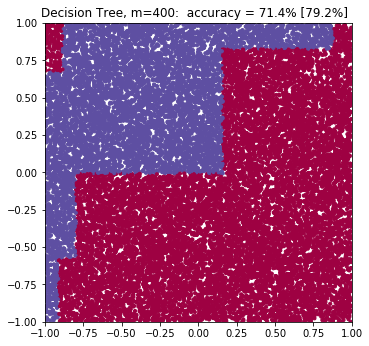

In [280]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [36]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

### Nonlinear SVM Classification

In [37]:
# From Geron'sHands-On Machine Learning book
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC

#### SVM with Polynomial Features

In [38]:
# Use polynomial features...
model_str="SVM-Poly"
#
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=7)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=2, loss="hinge", verbose=1, max_iter=50000, penalty='l2'))
])
# and do the fit:
poly_svm_clf.fit(X_train, y_train)

[LibLinear]

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=50000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=1))])

In [39]:
# Evaluate the model on training data
y_score_train = poly_svm_clf.predict(X_train)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 80.0 %


In [40]:
# Evaluate the model on the test data
y_score = poly_svm_clf.predict(X_test)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 74.76 %


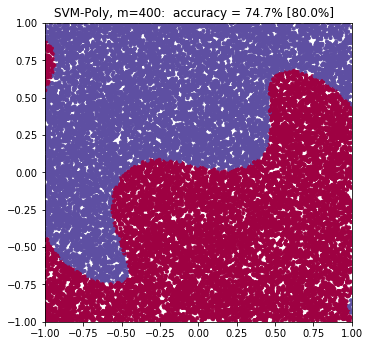

In [41]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [42]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

#### SVM with a Kernel

In [43]:
# Use a kernel instead 
model_str="SVM-kernel"
#
#                  very little regularization:   gamma=1, C=10
#                  good/medium amount (w/m=250)  gamma=0.7,  C=1
#                  heavily regularized           gamma=0.3, C=0.01
polykern_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=15, coef0=1.0, gamma=0.7, C=1, max_iter=2000000, 
                    probability=False, verbose=1))
])
# and do the fit:
polykern_svm_clf.fit(X_train, y_train)

[LibSVM]

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=15, gamma=0.7, kernel='poly',
  max_iter=2000000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1))])

In [44]:
# Evaluate the model on training data
y_score_train = polykern_svm_clf.predict(X_train)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 90.25 %


In [45]:
# Evaluate the model on the test data
y_score = polykern_svm_clf.predict(X_test)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 75.10 %


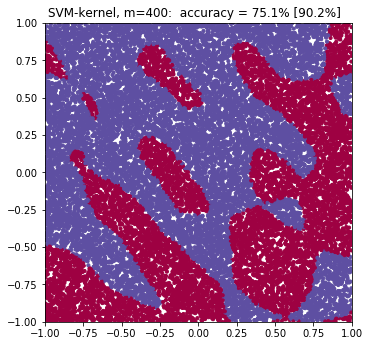

In [46]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [47]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

### Neural Network

In [48]:
# Additional packages etc to run Andrew Ng's Regularized Neural Network
# Adapted from Regularization.ipynb of Course 2 of Deep Learning
import reg_utils_dd as ng_utils


/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [49]:
reload(ng_utils)

<module 'reg_utils_dd' from '/home/dd/Documents/Python/chirp-to-ROC/reg_utils_dd.py'>

In [50]:
# Common parameters for the NN models without and with regularization
learn_rate = 0.15
hidden_layers = [40,9]   # 40,9

#### NN - No Regularization

/home/dd/Documents/Python/chirp-to-ROC/reg_utils_dd.py:226: RuntimeWarning: divide by zero encountered in log
  np.multiply(-np.log(1 - a3), 1 - Y)
/home/dd/Documents/Python/chirp-to-ROC/reg_utils_dd.py:226: RuntimeWarning: invalid value encountered in multiply
  np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 48000: 0.13135782502529222
Cost after iteration 48200: 0.13189968797752427
Cost after iteration 48400: 0.13428385212215913
Cost after iteration 48600: 0.1311233439255352
Cost after iteration 48800: 0.14404964205457066
Cost after iteration 49000: 0.14673941665809404
Cost after iteration 49200: 0.1340351363302198
Cost after iteration 49400: 0.13840988023159642
Cost after iteration 49600: 0.1324837694398006
Cost after iteration 49800: 0.1324551260918637
Cost after iteration 50000: 0.13030592210338784
Cost after iteration 50200: 0.1367010624320731
Cost after iteration 50400: 0.12750465372396058
Cost after iteration 50600: 0.13317470575787377
Cost after iteration 50800: 0.12948491591972677
Cost after iteration 51000: 0.14147517327933026
Cost after iteration 51200: 0.22603807108840465
Cost after iteration 51400: 0.14735321811582966
Cost after iteration 51600: 0.13068142928908252
Cost after iteration 51800: 0.13621964160946104
Cost after iteration 52000: 0.140360937342417

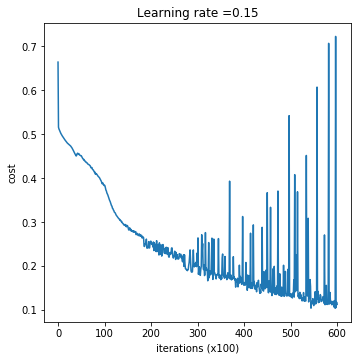

In [51]:
# No regularization, Lambda = 0
model_str="NN-NoReg"
Lambda=0

# Run the NN model
# Note: this model does not print anything out until the last 80% of iterations is reached...
parameters = ng_utils.model(X_train.T, y_train.reshape(1,-1), hidden2size=hidden_layers,
                            Lambda=Lambda, num_iterations=60000, learning_rate=learn_rate)

In [52]:
p01s, y_score_train = ng_utils.predict(X_train.T, parameters)
y_score_train = y_score_train.squeeze()
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 96.25 %


In [53]:
p01s, y_score = ng_utils.predict(X_test.T, parameters)
y_score = y_score.squeeze()
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 79.51 %


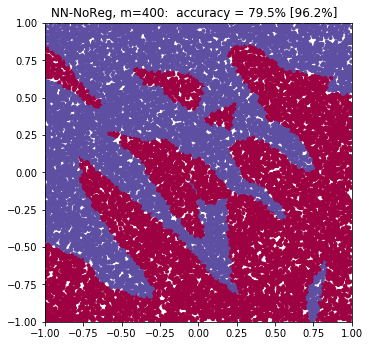

In [54]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [55]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

#### NN - L2 Regularization

In [56]:
model_str="NN-L2Reg"
Lambda = 7e-4

Cost after iteration 48000: 0.3646588310676586
Cost after iteration 48200: 0.36497238053091574
Cost after iteration 48400: 0.3654912945019682
Cost after iteration 48600: 0.36882546500926106
Cost after iteration 48800: 0.36471594397974577
Cost after iteration 49000: 0.3611972594371439
Cost after iteration 49200: 0.3648051654919199
Cost after iteration 49400: 0.36489715617230045
Cost after iteration 49600: 0.36691764721484954
Cost after iteration 49800: 0.36192845824749353
Cost after iteration 50000: 0.3606333241871128
Cost after iteration 50200: 0.36257187856050144
Cost after iteration 50400: 0.3613157433428877
Cost after iteration 50600: 0.3598135377055651
Cost after iteration 50800: 0.3587094424103749
Cost after iteration 51000: 0.3570211174483797
Cost after iteration 51200: 0.36257467631639895
Cost after iteration 51400: 0.36181055079650326
Cost after iteration 51600: 0.36277180409880694
Cost after iteration 51800: 0.36366758129110205
Cost after iteration 52000: 0.36067625178345686
C

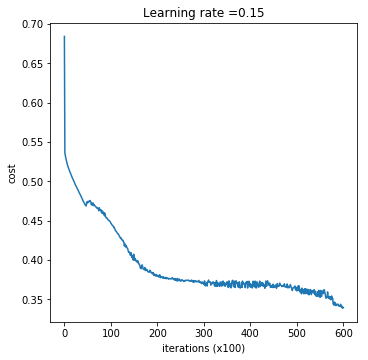

In [57]:
# Run the NN model
# Note: this model does not print anything out until the last 80% of iterations is reached...
parameters = ng_utils.model(X_train.T, y_train.reshape(1,-1), hidden2size=hidden_layers,
                            Lambda=Lambda, num_iterations=60000, learning_rate=learn_rate)

In [58]:
p01s, y_score_train = ng_utils.predict(X_train.T, parameters)
y_score_train = y_score_train.squeeze()
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 90.25 %


In [59]:
p01s, y_score = ng_utils.predict(X_test.T, parameters)
y_score = y_score.squeeze()
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 82.11 %


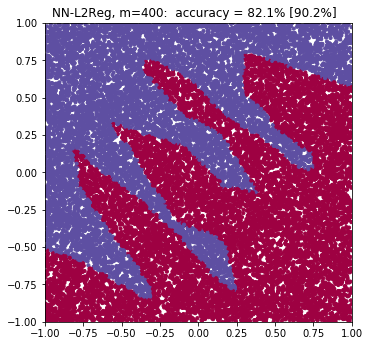

In [60]:
# Show how the model assigned classes
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

In [61]:
# --> For Confusion-Dots plot and ROC plot, go below to "Show model performance"

- - -
## Show the model performance

### Confusion Matrix, Confusion-Dots Plot, and the ROC

In [62]:
# Look at the distribution of y_score (for fun)
##import seaborn as sns
##sns.distplot(y_score, kde=False, rug=False)


Confusion matrix:

   Predicted   0.0   1.0
Actual                 
0.0          8746  1281
1.0          2297  7676

Results:

 False Pos =  12.775506133439713 %
 False Neg =  23.032186904642536 %
    Recall =  76.96781309535746 %
 Precision =  85.69833649659483 %

    Accuracy =  82.11 %
 Pos. fract. =  49.864999999999995 %


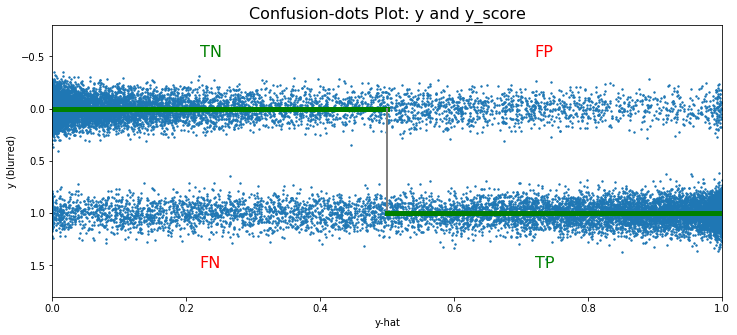

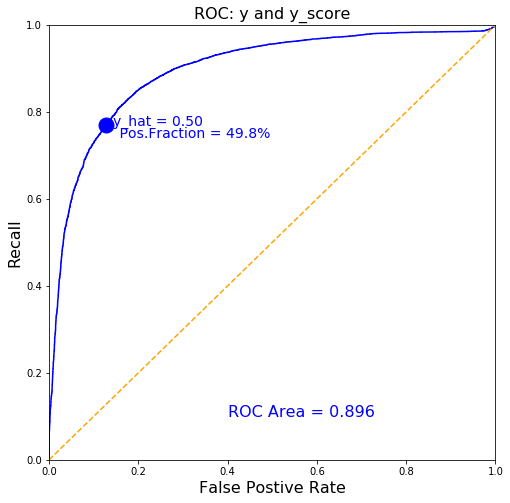

In [63]:
# How does the y_score do?
ysframe = chp.y_yhat_plots(y_test, y_score)

In [64]:
# Can look at the dataframe that is returned
##ysframe.head(5)
##ysframe.tail(5)